In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 1. Iris

##### a. 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width), 꽃받침길이(petal_length), 꽃받침폭(petal_width)의 평균, 표준편차 등 기초통계량(describe())을 구하시오.

In [3]:
iris = sns.load_dataset('iris')
iris.groupby(iris.species).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [4]:
iris.groupby(iris.species).agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

##### b. 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.

In [5]:
def get_new_stat(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr
    x[(x > higher) | (x < lower)] = np.nan
    #outlier = x.value_counts().sum() != 50
    outlier = x.isnull().sum() != 0     # 이 코드가 윗줄보다 좋아 보임
    return outlier, x.mean(), x.std()

In [6]:
s_sl = iris[iris.species == 'setosa']['sepal_length']
type(s_sl)

pandas.core.series.Series

In [7]:
species = []; items = []
old_mean_list = []; old_std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        #print(f'{spec} {wl}: {s.mean().round(3)}, {s.std().round(3)}')
        species.append(spec); items.append(wl)
        old_mean_list.append(s.mean())
        old_std_list.append(s.std())

In [8]:
tmp_iris = pd.DataFrame({
    'species': species,
    'items': items,
    'old_mean': old_mean_list,
    'old_std': old_std_list
})
new_iris = tmp_iris.set_index(['species', 'items'])
new_iris

old_mean   old_std
species    items                           
setosa     sepal_length     5.006  0.352490
           sepal_width      3.428  0.379064
           petal_length     1.462  0.173664
           petal_width      0.246  0.105386
versicolor sepal_length     5.936  0.516171
           sepal_width      2.770  0.313798
           petal_length     4.260  0.469911
           petal_width      1.326  0.197753
virginica  sepal_length     6.588  0.635880
           sepal_width      2.974  0.322497
           petal_length     5.552  0.551895
           petal_width      2.026  0.274650

In [9]:
outlier_list = []; mean_list = []; std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        outlier, new_mean, new_std = get_new_stat(s)
        #print(f'{spec} {wl}: {outlier}, {new_mean.round(3)}, {new_std.round(3)}')    
        outlier_list.append(outlier)
        mean_list.append(new_mean); std_list.append(new_std)

In [10]:
new_iris['outlier'] = outlier_list
new_iris['new_mean'] = mean_list
new_iris['new_std'] = std_list
new_iris

old_mean   old_std  outlier  new_mean   new_std
species    items                                                        
setosa     sepal_length     5.006  0.352490    False  5.006000  0.352490
           sepal_width      3.428  0.379064     True  3.431250  0.320343
           petal_length     1.462  0.173664     True  1.460870  0.129062
           petal_width      0.246  0.105386     True  0.233333  0.085883
versicolor sepal_length     5.936  0.516171    False  5.936000  0.516171
           sepal_width      2.770  0.313798    False  2.770000  0.313798
           petal_length     4.260  0.469911     True  4.285714  0.437798
           petal_width      1.326  0.197753    False  1.326000  0.197753
virginica  sepal_length     6.588  0.635880     True  6.622449  0.593459
           sepal_width      2.974  0.322497     True  2.955319  0.260275
           petal_length     5.552  0.551895    False  5.552000  0.551895
           petal_width      2.026  0.274650    False  2.026000  0.274650

In [11]:
pd.options.display.float_format = lambda new_iris: f'{new_iris:.3f}'
new_iris

old_mean  old_std  outlier  new_mean  new_std
species    items                                                      
setosa     sepal_length     5.006    0.352    False     5.006    0.352
           sepal_width      3.428    0.379     True     3.431    0.320
           petal_length     1.462    0.174     True     1.461    0.129
           petal_width      0.246    0.105     True     0.233    0.086
versicolor sepal_length     5.936    0.516    False     5.936    0.516
           sepal_width      2.770    0.314    False     2.770    0.314
           petal_length     4.260    0.470     True     4.286    0.438
           petal_width      1.326    0.198    False     1.326    0.198
virginica  sepal_length     6.588    0.636     True     6.622    0.593
           sepal_width      2.974    0.322     True     2.955    0.260
           petal_length     5.552    0.552    False     5.552    0.552
           petal_width      2.026    0.275    False     2.026    0.275

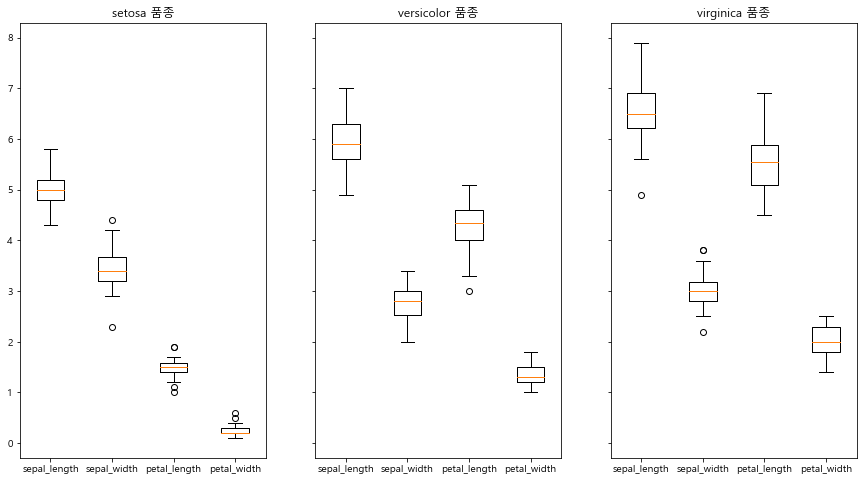

In [12]:
# 그래프로 확인
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8), sharey=True)
for i, spec in enumerate(['setosa', 'versicolor', 'virginica']):
    ax = axs[i]
    sl = iris[iris.species == spec].sepal_length
    sw = iris[iris.species == spec].sepal_width
    pl = iris[iris.species == spec].petal_length
    pw = iris[iris.species == spec].petal_width
    ax.boxplot((sl, sw, pl, pw), 
        labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
    ax.set_title(f'{spec} 품종')

plt.show()

### 2. Titanic

In [13]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,nan,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


##### a. 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 category1 열을 만드시오. category1 카테고리는 다음과 같이 정의됨

- 20살이 넘으면 성별을 그대로 사용한다.
- 20살 미만이면 성별에 관계없이 “child”라고 한다.

In [14]:
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,nan,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male


##### b. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고치시오.

In [15]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male


In [16]:
# a를 다시 계산
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male


##### c. 성별, 선실(class)별, 출발지(embark_town)별 생존율을 구하시오.

In [17]:
# 'alive': 범주형 --> 'survived': 정수
titanic.pivot_table('survived', 'sex')

,survived
sex,
female,0.742
male,0.189


In [18]:
# pivot_table 대신에 groupby를 쓸 수 있음
titanic[['sex','survived']].groupby(['sex']).mean().style.background_gradient(cmap='summer_r')

,survived
sex,
female,0.742038
male,0.188908


In [19]:
titanic.pivot_table('survived', 'class')

,survived
class,
First,0.630
Second,0.473
Third,0.242


In [20]:
titanic.pivot_table('survived', 'embark_town')

,survived
embark_town,
Cherbourg,0.554
Queenstown,0.390
Southampton,0.337


In [21]:
titanic.pivot_table('survived', ['sex','class'])

survived
sex    class           
female First      0.968
       Second     0.921
       Third      0.500
male   First      0.369
       Second     0.157
       Third      0.135

In [22]:
pd.crosstab([titanic.sex, titanic.survived], titanic.pclass, margins=True)

pclass             1    2    3  All
sex    survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

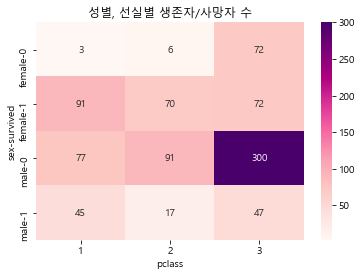

In [23]:
tsdf = pd.crosstab([titanic.sex, titanic.survived], titanic.pclass)
sns.heatmap(tsdf, cmap='RdPu', annot=True, fmt="d")
plt.title("성별, 선실별 생존자/사망자 수")
plt.show()

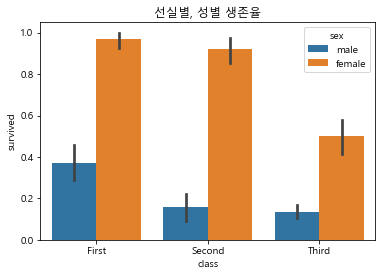

In [24]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic)
plt.title("선실별, 성별 생존율")
plt.show()

##### d. 타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹으로 나누고, 각 그룹별 생존율을 구하시오.

In [25]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic["age_cat"] = pd.cut(titanic.age, bins, labels=labels)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,female,청년
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male,청년
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male,중년


In [26]:
titanic.pivot_table('survived', 'age_cat')

,survived
age_cat,
미성년자,0.424
청년,0.334
중년,0.423
장년,0.356
노년,0.200


##### e. qcut 명령으로 세 개의 나이 그룹을 만들고, 나이 그룹별 남녀 성비와 생존율을 구하시오.

In [27]:
titanic['age_group'] = pd.qcut(titanic.age, 3, labels=["A1", "A2", "A3"])
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat,age_group
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male,청년,A2
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child,미성년자,A1
888,0,3,female,29.699,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,female,청년,A2
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male,청년,A2
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male,중년,A3


In [28]:
titanic.pivot_table('survived', 'age_group')

,survived
age_group,
A1,0.412
A2,0.336
A3,0.406


In [29]:
# gender: 남성이면 1, 여성이면 0
titanic['gender'] = titanic.apply(lambda r: 1 if r.sex == 'male' else 0, axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat,age_group,gender
886,0,2,male,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,male,청년,A2,1
887,1,1,female,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,child,미성년자,A1,0
888,0,3,female,29.699,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,female,청년,A2,0
889,1,1,male,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,male,청년,A2,1
890,0,3,male,32.000,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,male,중년,A3,1


In [30]:
titanic.pivot_table('gender', 'age_group')

,gender
age_group,
A1,0.595
A2,0.681
A3,0.668


In [31]:
titanic.pivot_table(['survived','gender'], 'age_group')

,gender,survived
age_group,,
A1,0.595,0.412
A2,0.681,0.336
A3,0.668,0.406


In [32]:
titanic[['age_group','survived','gender']].groupby(['age_group']).mean()

,survived,gender
age_group,,
A1,0.412,0.595
A2,0.336,0.681
A3,0.406,0.668


### 3. Mile Per Gallon

In [33]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.000,8,307.000,130.000,3504,12.000,70,usa,chevrolet chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,usa,buick skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,usa,plymouth satellite
3,16.000,8,304.000,150.000,3433,12.000,70,usa,amc rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,usa,ford torino


In [34]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000,398.000,398.000,392.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,104.469,2970.425,15.568,76.010
std,7.816,1.701,104.270,38.491,846.842,2.758,3.698
min,9.000,3.000,68.000,46.000,1613.000,8.000,70.000
25%,17.500,4.000,104.250,75.000,2223.750,13.825,73.000
50%,23.000,4.000,148.500,93.500,2803.500,15.500,76.000
75%,29.000,8.000,262.000,126.000,3608.000,17.175,79.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,82.000


##### a. 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc)을 추가하시오.

In [35]:
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.000,8,307.000,130.000,3504,12.000,70,usa,chevrolet chevelle malibu,0.423
1,15.000,8,350.000,165.000,3693,11.500,70,usa,buick skylark 320,0.471
2,18.000,8,318.000,150.000,3436,11.000,70,usa,plymouth satellite,0.472
3,16.000,8,304.000,150.000,3433,12.000,70,usa,amc rebel sst,0.493
4,17.000,8,302.000,140.000,3449,10.500,70,usa,ford torino,0.464


##### b. name으로부터 manufacturer(제조사)와 모델을 추출하여 새로운 열 manufacturer와 model을 추가하고, name 열은 삭제하시오.

In [36]:
def get_mfger(full_name):
    return full_name.split()[0]
def get_model(full_name):
    return ' '.join(full_name.split()[1:])

In [37]:
get_mfger('chrysler lebaron medallion'), get_model('chrysler lebaron medallion')

('chrysler', 'lebaron medallion')

In [38]:
get_mfger('ford torino'), get_model('ford torino')

('ford', 'torino')

In [39]:
mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)
del mpg['name']
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.000,8,307.000,130.000,3504,12.000,70,usa,0.423,chevrolet,chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,usa,0.471,buick,skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,usa,0.472,plymouth,satellite
3,16.000,8,304.000,150.000,3433,12.000,70,usa,0.493,amc,rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,usa,0.464,ford,torino


##### c. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오.

In [40]:
mpg[['cylinders','mpg']].groupby('cylinders').mean()

,mpg
cylinders,
3,20.550
4,29.287
5,27.367
6,19.986
8,14.963


In [41]:
# 아래와 같이 pivot_table을 사용해서 구할 수 있음
mpg.pivot_table('mpg','cylinders')

,mpg
cylinders,
3,20.550
4,29.287
5,27.367
6,19.986
8,14.963


##### d. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오.

In [42]:
mpg[['origin','hp_per_cc']].groupby('origin').mean()

,hp_per_cc
origin,
europe,0.740
japan,0.789
usa,0.512


##### e. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 Top 5를 구하시오.

In [43]:
mpg.manufacturer.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
subaru            4
opel              4
saab              4
chevy             3
maxda             2
bmw               2
cadillac          2
mercedes-benz     2
capri             1
mercedes          1
nissan            1
triumph           1
hi                1
vokswagen         1
toyouta           1
chevroelt         1
Name: manufacturer, dtype: int64

In [44]:
s = mpg.manufacturer.value_counts()
big = s[s >= 5].index.tolist()
print(big)

['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun', 'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile', 'mazda', 'fiat', 'peugeot', 'audi', 'volvo', 'vw', 'chrysler', 'renault']


In [45]:
# in 연산자 대신에 isin() method 사용
mpg[mpg['manufacturer'].isin(big)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.000,8,307.000,130.000,3504,12.000,70,usa,0.423,chevrolet,chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,usa,0.471,buick,skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,usa,0.472,plymouth,satellite
3,16.000,8,304.000,150.000,3433,12.000,70,usa,0.493,amc,rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,usa,0.464,ford,torino


In [46]:
mpg[mpg['manufacturer'].isin(big)][['manufacturer','mpg']].groupby('manufacturer').mean()

,mpg
manufacturer,
amc,18.246
audi,26.714
buick,19.182
chevrolet,20.472
chrysler,17.267
datsun,31.113
dodge,22.061
fiat,28.913
ford,19.694


In [47]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer')

,mpg
manufacturer,
amc,18.246
audi,26.714
buick,19.182
chevrolet,20.472
chrysler,17.267
datsun,31.113
dodge,22.061
fiat,28.913
ford,19.694


In [48]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacturer,
vw,39.017
honda,33.762
renault,32.880
datsun,31.113
mazda,30.860


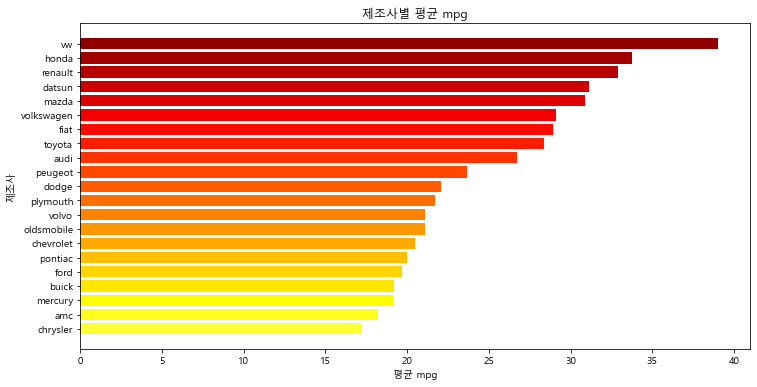

In [49]:
df = mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg')
y = np.arange(len(df.mpg))
category_colors = plt.get_cmap('hot')(np.linspace(0.8, 0.2, len(df.mpg)))
plt.figure(figsize=(12,6))
plt.barh(y, df.mpg, color=category_colors)
plt.yticks(y, df.index)
plt.xlabel('평균 mpg'); plt.ylabel('제조사')
plt.title('제조사별 평균 mpg')
plt.show()